In [31]:
import pyaudio
import struct
import matplotlib.pyplot as plt 
import librosa
import timeit # measure small time bits

In [32]:
formart = pyaudio.paFloat32
sample_freq = 44100
frame_size = 1024
no_frames = 220

In [33]:
p = pyaudio.PyAudio()
print("running...")

running...


ALSA lib pcm_dmix.c:1032:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib pcm_dmix.c:1032:(snd_pcm_dmix_open) unable to open slave


In [34]:
import numpy as np 

In [35]:
stream = p.open(
    format=formart,
    channels=1,
    input=True,
    frames_per_buffer=frame_size,
    rate=sample_freq
    )


In [36]:
data = stream.read(no_frames*frame_size)
# 220 * 1024
# decode = np.fromstring(data, np.float32)
decoded = np.frombuffer(data, np.float32)

In [37]:
stream.stop_stream()
stream.close()

In [38]:
p.terminate()
print("done.!")

done.!


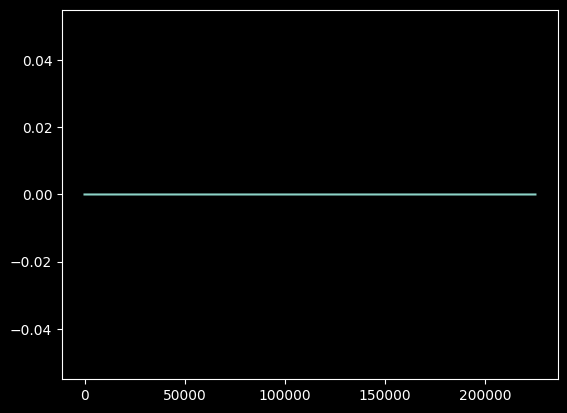

In [39]:
plt.plot(decoded)
plt.show()

In [40]:
tic = timeit.default_timer()

In [41]:
n_fft_rec = int(0.025*sample_freq)
hop_length_rec = int(0.01*sample_freq)

In [42]:
mel_spec_rec = librosa.feature.melspectrogram(
    y=decoded/1.0,
    sr=sample_freq,
    n_fft=n_fft_rec,
    hop_length=hop_length_rec,
    n_mels=40
)

In [43]:
log_mel_spec = np.log(mel_spec_rec)
rec_signal = log_mel_spec.T

/tmp/ipykernel_9409/982846663.py:1: RuntimeWarning: divide by zero encountered in log
  log_mel_spec = np.log(mel_spec_rec)


In [44]:
toc = timeit.default_timer()
print(toc-tic)

0.16305228100009117


Text(0.5, 0, 'Frames')

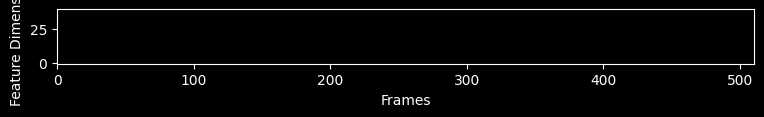

In [45]:
fig, ax = plt.subplots(figsize=(9,5))
ax.imshow(log_mel_spec, origin="lower", interpolation="nearest")
plt.ylabel("Feature Dimensions")
plt.xlabel("Frames")